
# Modelos de clasificación
## Regresión logistica

Cargamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

### Statsmodels

Para desarrollar un regresión logística en Python podemos hacer uso de dos librerías unna de ellas es **statsmodels**, usaremos el dataset **Titanic** que usamos en clases anteriores.

In [2]:
import statsmodels as model

En la carga de los datos podemos quitar aquellas columnas que no serán de interes.

In [3]:
df_titanic = pd.read_csv("data/titanic.csv").drop(["name", "ticket", "cabin", 
                                                                "boat", "body", "home.dest"], 
                                                               axis = 1)

In [4]:
df_titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [5]:
df_titanic.groupby("survived").size()

survived
0    812
1    500
dtype: int64

In [6]:
df_titanic.groupby("survived").mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.497537,30.537111,0.522167,0.332512,23.650086
1,1.962000,28.918228,0.462000,0.476000,49.361184


C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


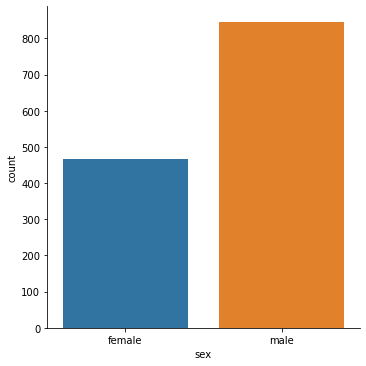

In [7]:
sb.factorplot('sex',data=df_titanic,kind = "count")

C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


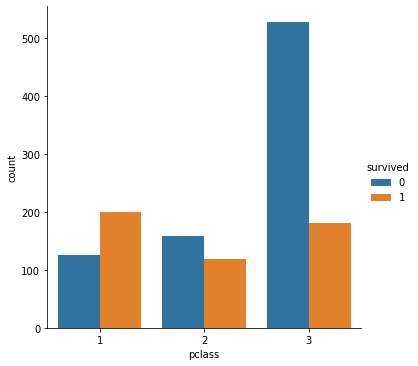

In [8]:
sb.factorplot('pclass', data=df_titanic, hue='survived', kind="count")

C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


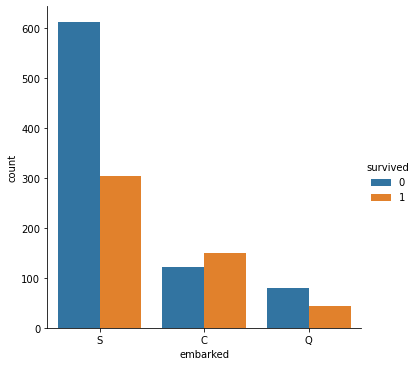

In [9]:
sb.factorplot('embarked',data=df_titanic,hue='survived',kind="count")

C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jhon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


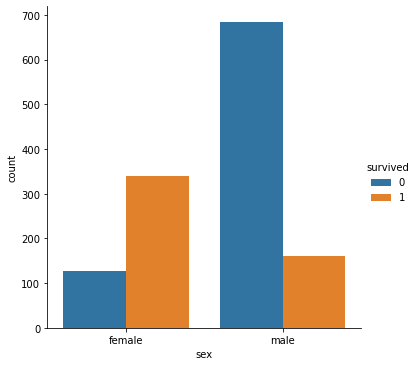

In [10]:
sb.factorplot('sex',data=df_titanic,hue='survived',kind="count")

<AxesSubplot:xlabel='pclass', ylabel='fare'>

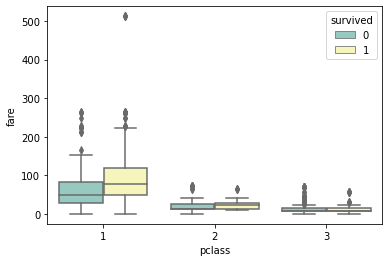

In [11]:
sb.boxplot(x="pclass", y="fare", hue = "survived", data=df_titanic, palette="Set3")

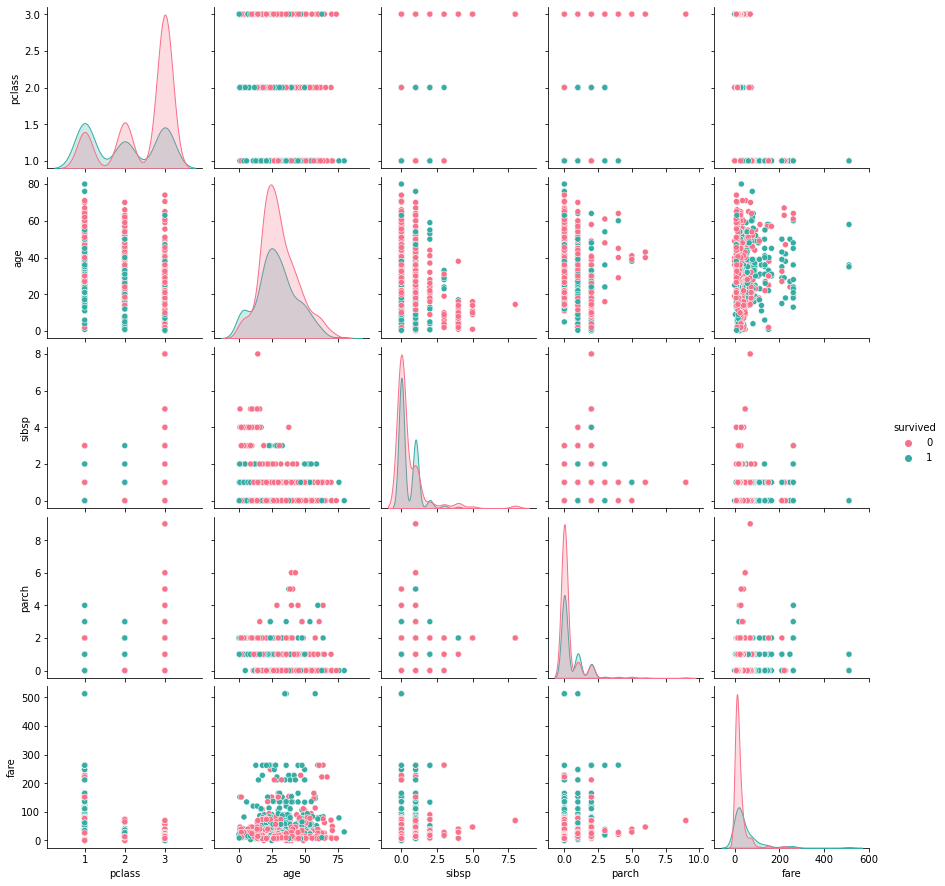

In [12]:
sb.pairplot(df_titanic, hue="survived", palette="husl",  aspect=1)

In [13]:
df_titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1312.000000,1312.000000,1049.000000,1312.000000,1312.000000,1311.000000
mean,2.293445,0.381098,29.878138,0.499238,0.387195,33.455997
std,0.838629,0.485842,14.393234,1.040741,0.866930,51.910188
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


Siempre debemos tener en cuenta los tipos de variables con las cuales trabajaremos. De ser necesario cambiar 

In [14]:
df_titanic.pclass=df_titanic.pclass.astype('category',copy=False)

In [15]:
datos_numericos = df_titanic.select_dtypes(include=['float64', "int64"])
datos_categoricos = df_titanic.select_dtypes(exclude=['float64', "int64"])

In [16]:
datos_numericos.head()

,survived,age,sibsp,parch,fare
0,1,29.0000,0,0,211.3375
1,1,0.9167,1,2,151.5500
2,0,2.0000,1,2,151.5500
3,0,30.0000,1,2,151.5500
4,0,25.0000,1,2,151.5500


In [17]:
datos_categoricos.head()

,pclass,sex,embarked
0,1,female,S
1,1,male,S
2,1,female,S
3,1,male,S
4,1,female,S


In [18]:
datos_numericos.describe()

,survived,age,sibsp,parch,fare
count,1312.000000,1049.000000,1312.000000,1312.000000,1311.000000
mean,0.381098,29.878138,0.499238,0.387195,33.455997
std,0.485842,14.393234,1.040741,0.866930,51.910188
min,0.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
#df_titanic.age.fillna(df_titanic.age.mean(), inplace=True)
#df_titanic.fare.fillna(df_titanic.fare.mean(), inplace=True)

In [19]:
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

C:\Users\Jhon\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
#datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)
datos_categoricos_codificados = pd.get_dummies(datos_categoricos)

In [21]:
datos_categoricos_codificados.head()

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1
2,1,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,1


In [22]:
datos_categoricos.head()

,pclass,sex,embarked
0,1,female,S
1,1,male,S
2,1,female,S
3,1,male,S
4,1,female,S


In [23]:
df_titanic_final = pd.concat([datos_numericos, datos_categoricos_codificados], axis=1)

In [24]:
df_titanic_final.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,0,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,0,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


In [25]:
df_titanic_final = df_titanic_final.drop([ "pclass_3", "sex_male","embarked_Q"], axis=1)

In [26]:
df_titanic_final.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,sex_female,embarked_C,embarked_S
0,1,29.0000,0,0,211.3375,1,0,1,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1
2,0,2.0000,1,2,151.5500,1,0,1,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1
4,0,25.0000,1,2,151.5500,1,0,1,0,1


In [27]:
X=df_titanic_final.drop('survived', axis=1)
y=df_titanic_final['survived']

In [28]:
import statsmodels.api as sm

In [29]:
logit_model=sm.Logit(y,X, iter = 10)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462621
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.304      
Dependent Variable: survived         AIC:              1231.9179  
Date:               2021-07-04 08:42 BIC:              1278.5316  
No. Observations:   1312             Log-Likelihood:   -606.96    
Df Model:           8                LL-Null:          -871.95    
Df Residuals:       1303             LLR p-value:      2.5746e-109
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
age            -0.0497    0.0052  -9.5362  0.0000  -0.0600  -0.0395
sibsp          -0.3480    0.0906  -3.8428  0.0001

In [30]:
np.where(df_titanic['sex'] =='male', 1, 0)

array([0, 1, 0, ..., 1, 1, 1])

In [31]:
df_titanic['pclass']=np.where(df_titanic['pclass'] ==1, 1, 0)
df_titanic['sex_female']=np.where(df_titanic['sex'] =='female', 1, 0)

In [32]:
df_titanic_2 = df_titanic.copy()

In [33]:
df_titanic_2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,sex_female
0,1,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,0
2,1,0,female,2.0000,1,2,151.5500,S,1
3,1,0,male,30.0000,1,2,151.5500,S,0
4,1,0,female,25.0000,1,2,151.5500,S,1


In [34]:
df_titanic_2=df_titanic_2.drop(["sex", "parch", "embarked", "fare"], axis = 1)
df_titanic_2.head()

,pclass,survived,age,sibsp,sex_female
0,1,1,29.0000,0,1
1,1,1,0.9167,1,0
2,1,0,2.0000,1,1
3,1,0,30.0000,1,0
4,1,0,25.0000,1,1


In [35]:
for col in df_titanic_2.columns:
    df_titanic_2[col].fillna(df_titanic_2[col].mean(), inplace=True)

In [36]:
X=df_titanic_2.drop("survived", axis=1)
y=df_titanic_2['survived']

In [37]:
X.describe()

,pclass,age,sibsp,sex_female
count,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.247713,29.878138,0.499238,0.355183
std,0.431849,12.868789,1.040741,0.478751
min,0.000000,0.166700,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000
50%,0.000000,29.878138,0.000000,0.000000
75%,0.000000,35.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,1.000000


In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.478863
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.279      
Dependent Variable: survived         AIC:              1264.5353  
Date:               2021-07-04 08:42 BIC:              1285.2525  
No. Observations:   1312             Log-Likelihood:   -628.27    
Df Model:           3                LL-Null:          -871.95    
Df Residuals:       1308             LLR p-value:      2.6016e-105
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
pclass         1.9612    0.1808   10.8479  0.0000   1.6068   2.3155
age           -0.0566    0.0035  -16.1462  0.0000

In [39]:
df_titanic_2.groupby("survived").mean()

,pclass,age,sibsp,sex_female
survived,,,,
0,0.153941,30.382918,0.522167,0.156404
1,0.400000,29.058375,0.462000,0.678000


## Con el módulo de Scikit Learn

Cargamos `LogisticRegression` del modulo **linear_model**  del **sklearn** para ejecutar la regresión logística

In [40]:
from sklearn.linear_model import LogisticRegression

Cargamos `metrics` del **sklearn** para obtener las princiaples métricas de evaluación del modelo

In [41]:
from sklearn import metrics

Cargamos `train_test_split` del modulo **model_selection** para obtener los datos de entrenamiento y evaluación del modelo

In [42]:
from sklearn.model_selection import train_test_split

Particionamos nuestros datos y ajustamos un modelo de regresión logística. 

In [43]:
X.head()

,pclass,age,sibsp,sex_female
0,1,29.0000,0,1
1,1,0.9167,1,0
2,1,2.0000,1,1
3,1,30.0000,1,0
4,1,25.0000,1,1


In [46]:
X.shape

(1312, 4)

In [44]:
y[:10]

0    1
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
estimador_logis = LogisticRegression()
estimador_logis.fit(X_train, y_train)

LogisticRegression()

In [48]:
X.shape

(1312, 4)

In [49]:
X_train.shape, X_test.shape

((1049, 4), (263, 4))

In [50]:
predicciones = estimador_logis.predict(X_test)

predicciones[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
predicciones_probabilidades = estimador_logis.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[0.79422594, 0.20577406],
       [0.86126069, 0.13873931],
       [0.36986826, 0.63013174],
       [0.92753853, 0.07246147],
       [0.98760114, 0.01239886],
       [0.60591441, 0.39408559],
       [0.92562798, 0.07437202],
       [0.16183791, 0.83816209],
       [0.33036873, 0.66963127],
       [0.52238898, 0.47761102]])

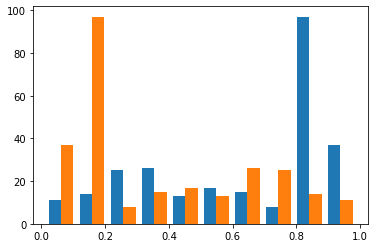

In [52]:
plt.hist(predicciones_probabilidades);

In [53]:
probs_df = pd.DataFrame(predicciones_probabilidades)
probs_df.head()

,0,1
0,0.794226,0.205774
1,0.861261,0.138739
2,0.369868,0.630132
3,0.927539,0.072461
4,0.987601,0.012399


In [54]:
X_test.reset_index()

,index,pclass,age,sibsp,sex_female
0,587,0,2.000000,1,0
1,608,0,30.000000,0,0
2,333,0,36.000000,0,1
3,1015,0,55.500000,0,0
4,1170,0,29.878138,8,0
...,...,...,...,...,...
258,638,0,35.000000,0,0
259,549,0,3.000000,1,0
260,613,0,26.000000,0,0
261,984,0,29.878138,0,1


In [55]:
df_resultados = X_test.reset_index().copy()
df_resultados["objetivo"] = y_test.tolist()
df_resultados["prediccion"] = predicciones
df_resultados = pd.concat([df_resultados, probs_df], axis=1)
df_resultados.head()

,index,pclass,age,sibsp,sex_female,objetivo,prediccion,0,1
0,587,0,2.000000,1,0,1,0,0.794226,0.205774
1,608,0,30.000000,0,0,0,0,0.861261,0.138739
2,333,0,36.000000,0,1,1,1,0.369868,0.630132
3,1015,0,55.500000,0,0,0,0,0.927539,0.072461
4,1170,0,29.878138,8,0,0,0,0.987601,0.012399


In [57]:
df_resultados[["objetivo", "prediccion", 0, 1]].head(10)

,objetivo,prediccion,0,1
0,1,0,0.794226,0.205774
1,0,0,0.861261,0.138739
2,1,1,0.369868,0.630132
3,0,0,0.927539,0.072461
4,0,0,0.987601,0.012399
5,1,0,0.605914,0.394086
6,0,0,0.925628,0.074372
7,1,1,0.161838,0.838162
8,1,1,0.330369,0.669631
9,0,0,0.522389,0.477611


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[137,  20],
       [ 37,  69]], dtype=int64)

In [59]:
df = pd.DataFrame({"clase_real":y_test,
                   "clase_pred": predicciones,
                   "probabilidades_0":estimador_logis.predict_proba(X_test)[:,0],
                    "probabilidades_1":estimador_logis.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [60]:
df.sample(10)
#df.head(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
597,1,0,0.860847,0.139153,1.0
944,0,0,0.860847,0.139153,1.0
975,0,1,0.378208,0.621792,1.0
853,0,0,0.843421,0.156579,1.0
769,0,0,0.831846,0.168154,1.0
693,1,0,0.827838,0.172162,1.0
884,0,0,0.911866,0.088134,1.0
1124,0,1,0.330369,0.669631,1.0
984,1,1,0.330369,0.669631,1.0
1015,0,0,0.927539,0.072461,1.0


In [61]:
df.query("probabilidades_1>0.4 & clase_pred==0").head(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
52,0,0,0.522389,0.477611,1.0
254,1,0,0.535668,0.464332,1.0
268,0,0,0.573346,0.426654,1.0
298,1,0,0.543578,0.456422,1.0
1211,0,0,0.510511,0.489489,1.0
152,1,0,0.535668,0.464332,1.0
202,1,0,0.578508,0.421492,1.0
320,1,0,0.535668,0.464332,1.0
80,0,0,0.535668,0.464332,1.0
283,0,0,0.535668,0.464332,1.0


In [62]:
df.query("probabilidades_0>0.5 & clase_pred==1")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


In [63]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [64]:
predicciones_probabilidades[:10]

array([[0.79422594, 0.20577406],
       [0.86126069, 0.13873931],
       [0.36986826, 0.63013174],
       [0.92753853, 0.07246147],
       [0.98760114, 0.01239886],
       [0.60591441, 0.39408559],
       [0.92562798, 0.07437202],
       [0.16183791, 0.83816209],
       [0.33036873, 0.66963127],
       [0.52238898, 0.47761102]])

In [65]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.40)[:10]

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1.])

In [69]:
pred_1 = probabilidades_a_clases(predicciones_probabilidades, umbral=0.60)
confusion_matrix(y_test, pred_1)

array([[139,  18],
       [ 48,  58]], dtype=int64)

In [70]:
predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, 0.6)

In [71]:
sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
sensibilidad_umbral

0.5471698113207547

In [72]:
precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
precision_umbral

0.6000864669745243

In [73]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.001, max=0.999, step=0.001, value=0.001))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
    exactitud_umbral = metrics.accuracy_score(y_test, predicciones_en_umbral)
    roc_auc = metrics.roc_auc_score(y_test, predicciones_en_umbral)
    mc_umbral = confusion_matrix(y_test, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Exacitud:{:.3f}
    Area_ROC:{:.3F}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        exactitud_umbral,
        roc_auc
    ))
    print("Matriz de confusión")
    print(mc_umbral)

interactive(children=(FloatSlider(value=0.001, description='umbral', max=0.999, min=0.001, step=0.001), Output…

In [74]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral =  metrics.average_precision_score(y_test, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)

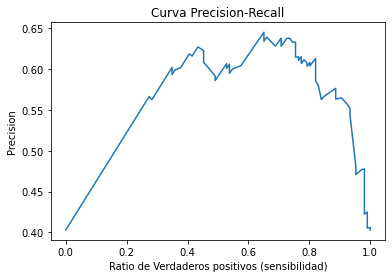

In [75]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

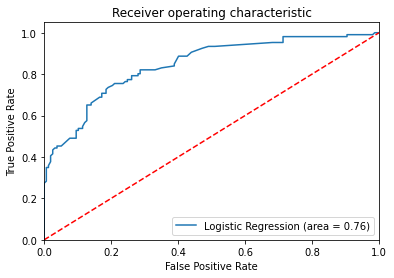

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, estimador_logis.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, estimador_logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [77]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(y_test, predicciones, predicciones_probabilidades)


    Exactitud: 0.783
    Precisión: 0.645
    Sensibilidad: 0.651
    Area bajo curva (AUC): 0.762
    Puntuación F1: 0.708
    


In [79]:
GINI = 2 * AUX - 1

NameError: name 'AUX' is not defined